In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def make_plot(data_frame, title, if_10 = False):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'AVG_accuracy': 'Dokładność',
               'AVG_loss': 'Funkcja kosztu',
               'Round': 'Runda',
               'NoiseMultiplier' : 'Mnożnik szumu'})
  print(dff.columns)
  try:
    plt.subplot(121)
    plt.title('Dokładność dla ' + title)
    sns.lineplot(data=dff, x='Runda', y='Dokładność', hue='Mnożnik szumu', palette='dark')
    plt.subplot(122)
    plt.title('Funkcja kosztu dla ' + title)
    sns.lineplot(data=dff, x='Runda', y='Funkcja kosztu', hue='Mnożnik szumu', palette='dark')
  except:
    plt.subplot(121)
    plt.title('Dokładność dla ' + title)
    sns.lineplot(data=dff, x='Round', y='Dokładność', hue='Mnożnik szumu', palette='dark')
    plt.subplot(122)
    plt.title('Funkcja kosztu dla ' + title)
    sns.lineplot(data=dff, x='Round', y='Funkcja kosztu', hue='Mnożnik szumu', palette='dark')

def smaller_sampling(data_frame):
  to_delete = []
  delete = 0
  for i in range(len(data_frame)):
    if delete == 1:
      to_delete.append(i)
      delete = 0
    else:
      delete = 1
  return data_frame.drop(data_frame.index[to_delete])

def delete_for_10_client(data_frame):
    buff = data_frame[data_frame.NoiseMultiplier != 0.5]
    buff_2 = data_frame[data_frame.NoiseMultiplier == 0.5]
    buff_3 = data_frame[data_frame.NoiseMultiplier == 0.75]
    return [buff[buff.NoiseMultiplier != 0.75], pd.concat([buff_2, buff_3], ignore_index=True)]

def get_from_all_files(list_of_dataframes, needed_noise):
  list_to_concat = []
  for buff in list_of_dataframes:
    buff = buff[buff.NoiseMultiplier == needed_noise]

def make_plot_interval(data_frame, title):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'AVG_accuracy': 'Dokładność',
               'AVG_loss': 'Funkcja kosztu',
               'Round ': 'Runda',})
  try:
    plt.subplot(121)
    plt.title('Funkcja kosztu dla ' + title)
    plt.plot(dff['Round'],dff['Funkcja kosztu'])
    plt.fill_between(dff['Round'], (dff['Funkcja kosztu']-dff['interval_loss']), (dff['Funkcja kosztu']+dff['interval_loss']), color='b', alpha=.1)
    plt.subplot(122)
    plt.title('dokldamodsa dla ' + title)
    plt.plot(dff['Round'],dff['Dokładność'])
    plt.fill_between(dff['Round'], (dff['Dokładność']-dff['interval_accuracy']), (dff['Dokładność']+dff['interval_accuracy']), color='b', alpha=.1)
  except:
    plt.subplot(121)
    plt.title('kosztu dla ' + title)
    plt.plot(dff['Runda'],dff['Funkcja kosztu'])
    plt.fill_between(dff['Runda'], (dff['Funkcja kosztu']-dff['interval_loss']), (dff['Funkcja kosztu']+dff['interval_loss']), color='b', alpha=.1)
    plt.subplot(122)
    plt.title('dokldamodść dla ' + title)
    plt.plot(dff['Runda'],dff['Dokładność'])
    plt.fill_between(dff['Runda'], (dff['Dokładność']-dff['interval_accuracy']), (dff['Dokładność']+dff['interval_accuracy']), color='b', alpha=.1)

Index(['Runda', 'Mnożnik szumu', 'Dokładność', 'Funkcja kosztu',
       'interval_accuracy', 'interval_loss', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')
Index(['Unnamed: 0', 'Runda', 'Mnożnik szumu', 'Dokładność', 'Funkcja kosztu',
       'interval_accuracy', 'interval_loss'],
      dtype='object')
Index(['Unnamed: 0', 'Runda', 'Mnożnik szumu', 'Dokładność', 'Funkcja kosztu',
       'interval_accuracy', 'interval_loss'],
      dtype='object')
Index(['Runda', 'Mnożnik szumu', 'Dokładność', 'Funkcja kosztu',
       'interval_accuracy', 'interval_loss'],
      dtype='object')
Index(['Unnamed: 0', 'Runda', 'Mnożnik szumu', 'Dokładność', 'Funkcja kosztu',
       'interval_accuracy', 'interval_loss'],
      dtype='object')


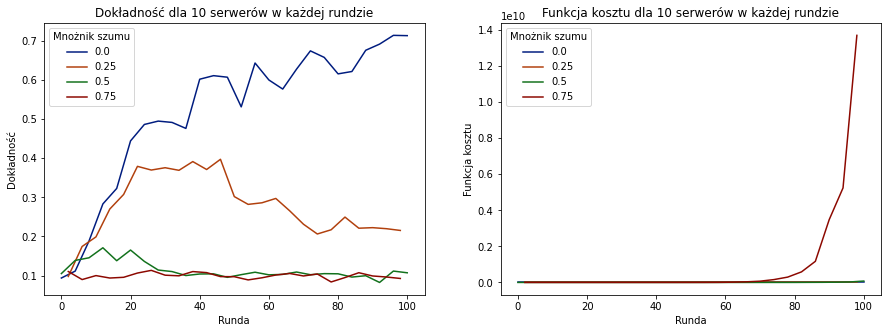

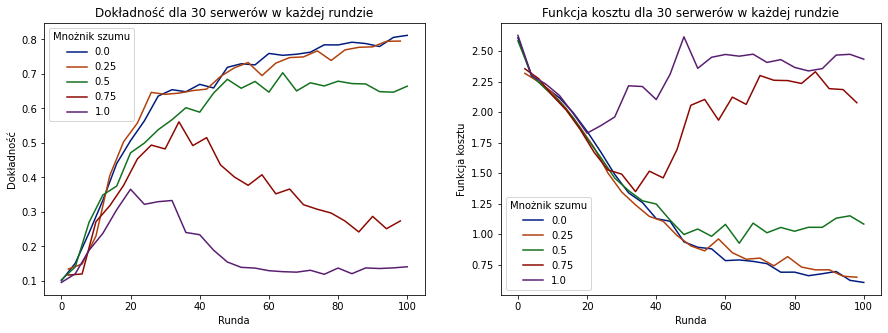

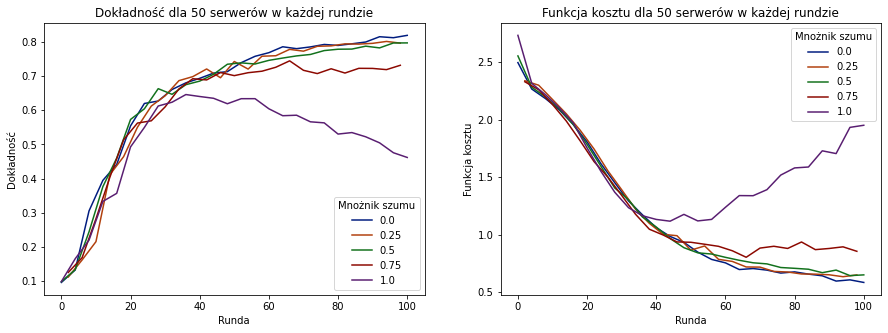

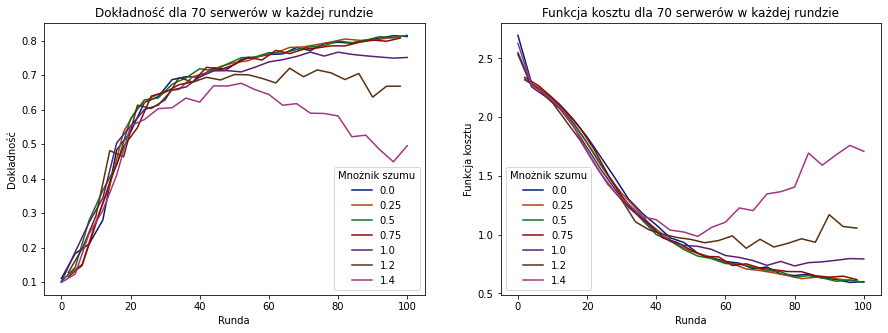

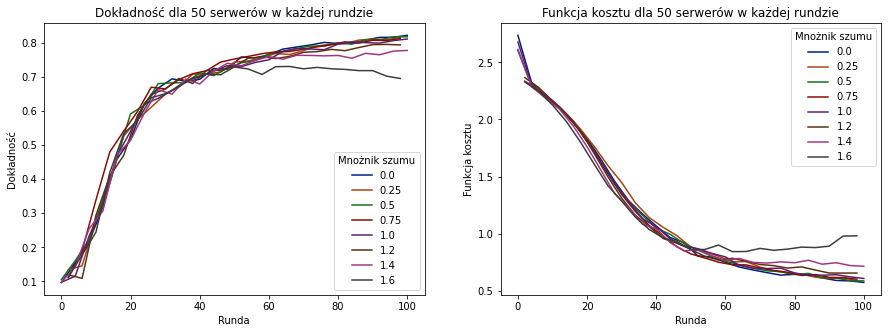

In [ ]:
client10 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client10_all.csv')
client10 = smaller_sampling(client10)
make_plot(client10, '10 serwerów w każdej rundzie')

client30 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client30_all.csv')
client30 = smaller_sampling(client30)
make_plot(client30, '30 serwerów w każdej rundzie')

client50 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client50_all.csv')
client50 = smaller_sampling(client50)
make_plot(client50, '50 serwerów w każdej rundzie')

client70 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70 = smaller_sampling(client70)
make_plot(client70, '70 serwerów w każdej rundzie')

client100 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100 = smaller_sampling(client100)
make_plot(client100, '50 serwerów w każdej rundzie')

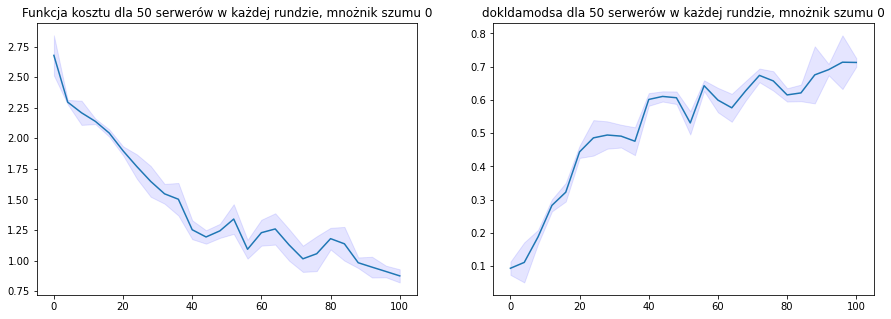

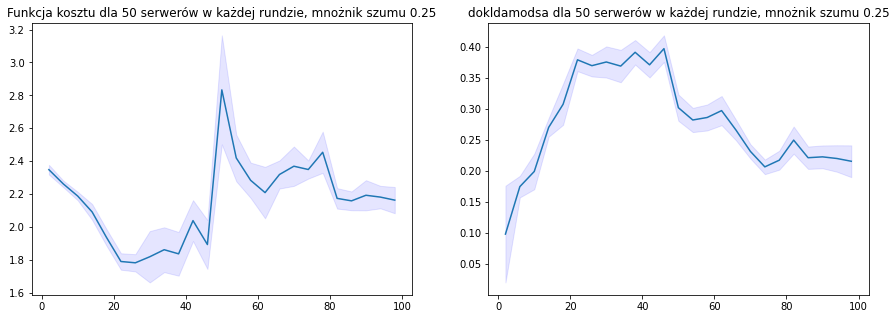

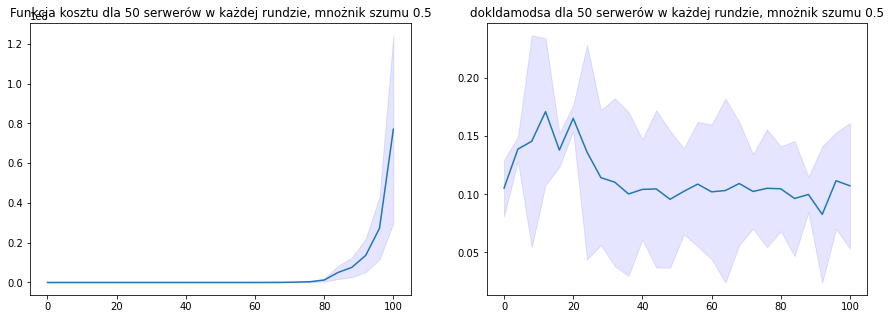

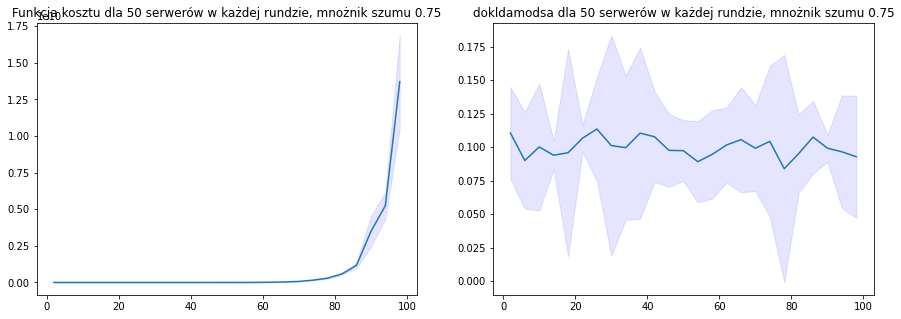

In [ ]:
client10_0 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client10_all.csv')
client10_0 = smaller_sampling(client10_0)
client10_0 =  client10_0[client10_0.NoiseMultiplier == 0]
make_plot_interval(client10_0, '50 serwerów w każdej rundzie, mnożnik szumu 0')

client10_25 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client10_all.csv')
client10_25 = smaller_sampling(client10_25)
client10_25 =  client10_25[client10_25.NoiseMultiplier == 0.25]
make_plot_interval(client10_25, '50 serwerów w każdej rundzie, mnożnik szumu 0.25')

client10_5 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client10_all.csv')
client10_5 = smaller_sampling(client10_5)
client10_5 =  client10_5[client10_5.NoiseMultiplier == 0.5]
make_plot_interval(client10_5, '50 serwerów w każdej rundzie, mnożnik szumu 0.5')

client10_75 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client10_all.csv')
client10_75 = smaller_sampling(client10_75)
client10_75 =  client10_75[client10_75.NoiseMultiplier == 0.75]
make_plot_interval(client10_75, '50 serwerów w każdej rundzie, mnożnik szumu 0.75')

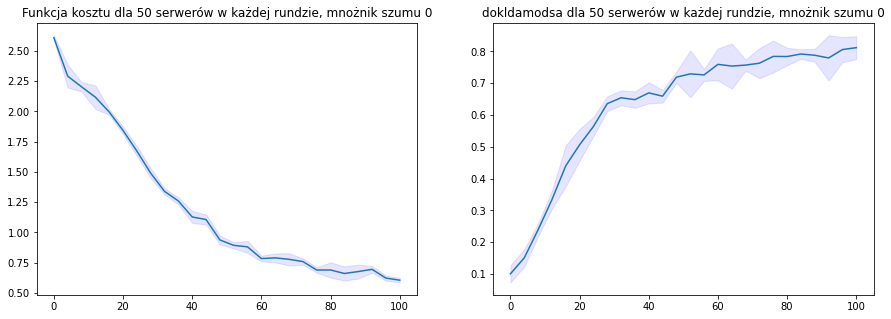

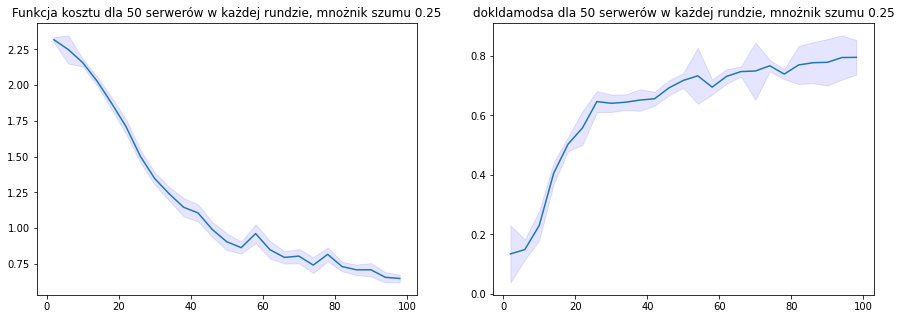

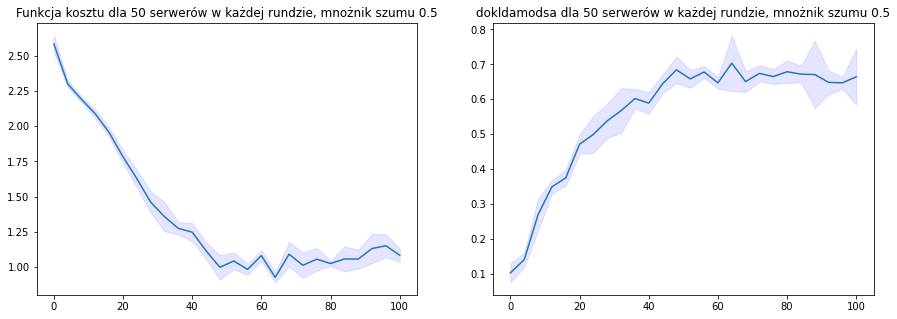

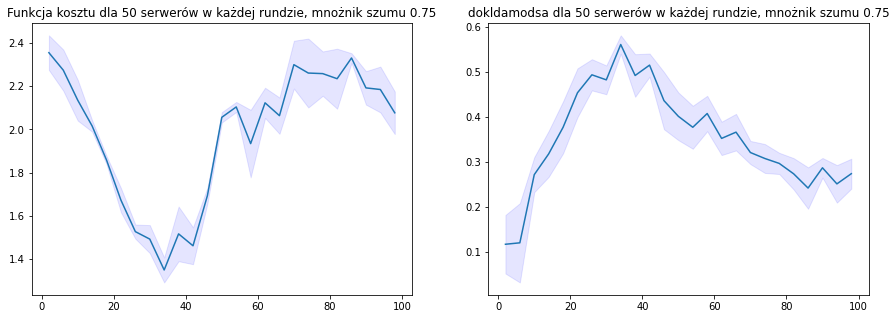

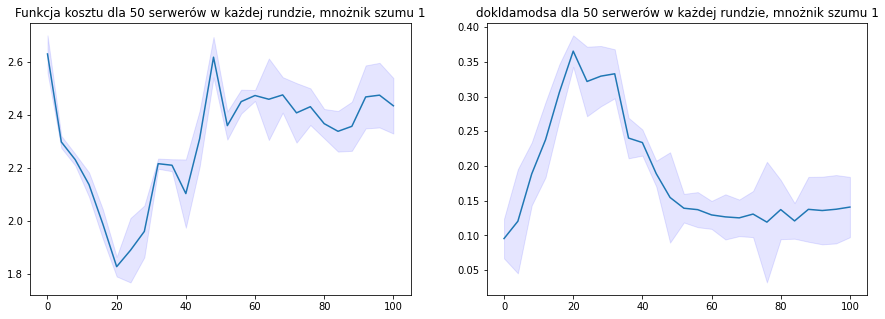

In [ ]:
client30_0 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client30_all.csv')
client30_0 = smaller_sampling(client30_0)
client30_0 =  client30_0[client30_0.NoiseMultiplier == 0]
make_plot_interval(client30_0, '50 serwerów w każdej rundzie, mnożnik szumu 0')

client30_25 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client30_all.csv')
client30_25 = smaller_sampling(client30_25)
client30_25 =  client30_25[client30_25.NoiseMultiplier == 0.25]
make_plot_interval(client30_25, '50 serwerów w każdej rundzie, mnożnik szumu 0.25')

client30_5 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client30_all.csv')
client30_5 = smaller_sampling(client30_5)
client30_5 =  client30_5[client30_5.NoiseMultiplier == 0.5]
make_plot_interval(client30_5, '50 serwerów w każdej rundzie, mnożnik szumu 0.5')

client30_75 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client30_all.csv')
client30_75 = smaller_sampling(client30_75)
client30_75 =  client30_75[client30_75.NoiseMultiplier == 0.75]
make_plot_interval(client30_75, '50 serwerów w każdej rundzie, mnożnik szumu 0.75')

client30_1 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client30_all.csv')
client30_1 = smaller_sampling(client30_1)
client30_1 =  client30_1[client30_1.NoiseMultiplier == 1]
make_plot_interval(client30_1, '50 serwerów w każdej rundzie, mnożnik szumu 1')

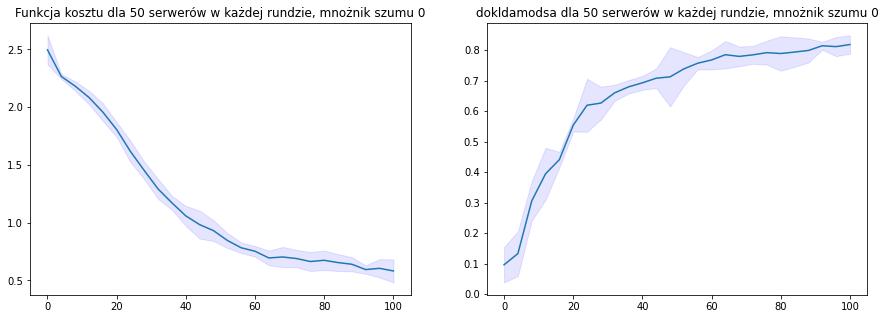

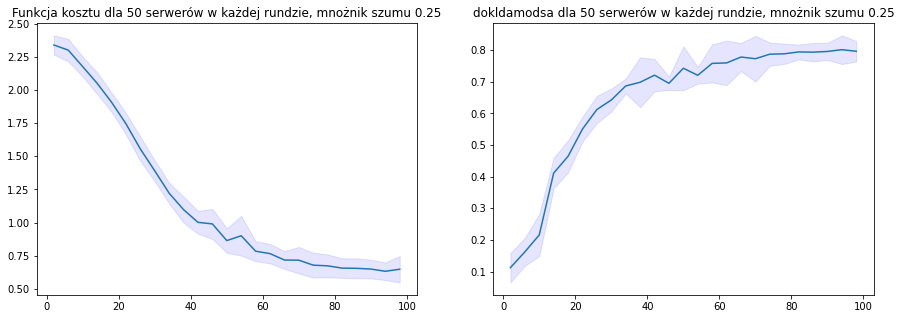

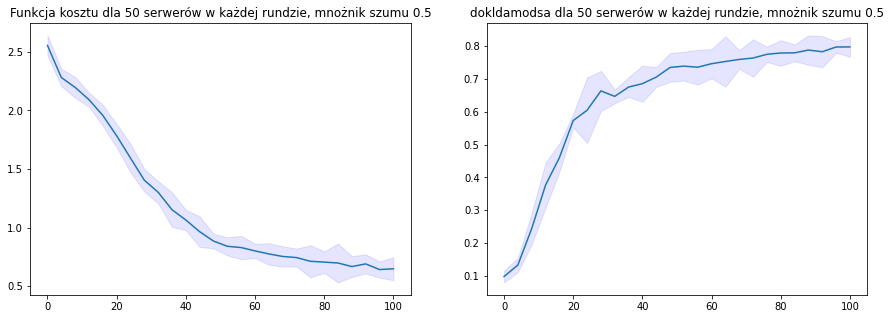

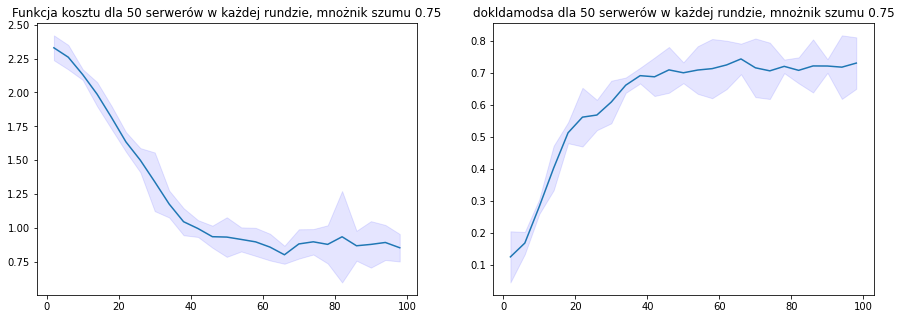

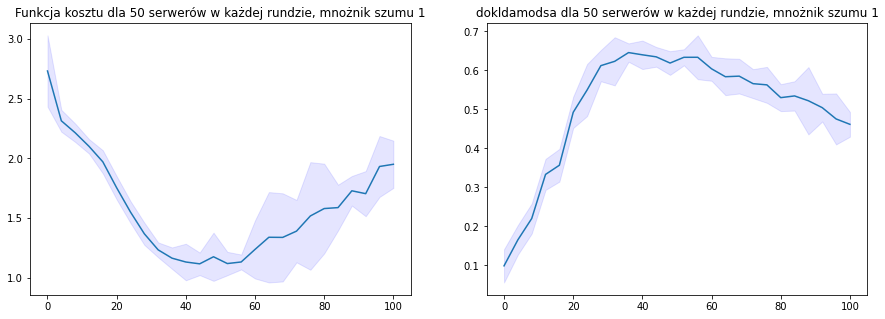

In [ ]:
client50_0 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client50_all.csv')
client50_0 = smaller_sampling(client50_0)
client50_0 =  client50_0[client50_0.NoiseMultiplier == 0]
make_plot_interval(client50_0, '50 serwerów w każdej rundzie, mnożnik szumu 0')

client50_25 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client50_all.csv')
client50_25 = smaller_sampling(client50_25)
client50_25 =  client50_25[client50_25.NoiseMultiplier == 0.25]
make_plot_interval(client50_25, '50 serwerów w każdej rundzie, mnożnik szumu 0.25')

client50_5 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client50_all.csv')
client50_5 = smaller_sampling(client50_5)
client50_5 =  client50_5[client50_5.NoiseMultiplier == 0.5]
make_plot_interval(client50_5, '50 serwerów w każdej rundzie, mnożnik szumu 0.5')

client50_75 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client50_all.csv')
client50_75 = smaller_sampling(client50_75)
client50_75 =  client50_75[client50_75.NoiseMultiplier == 0.75]
make_plot_interval(client50_75, '50 serwerów w każdej rundzie, mnożnik szumu 0.75')

client50_1 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client50_all.csv')
client50_1 = smaller_sampling(client50_1)
client50_1 =  client50_1[client50_1.NoiseMultiplier == 1]
make_plot_interval(client50_1, '50 serwerów w każdej rundzie, mnożnik szumu 1')

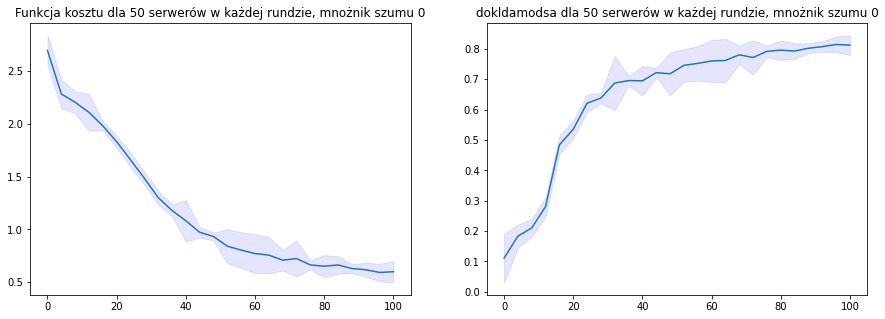

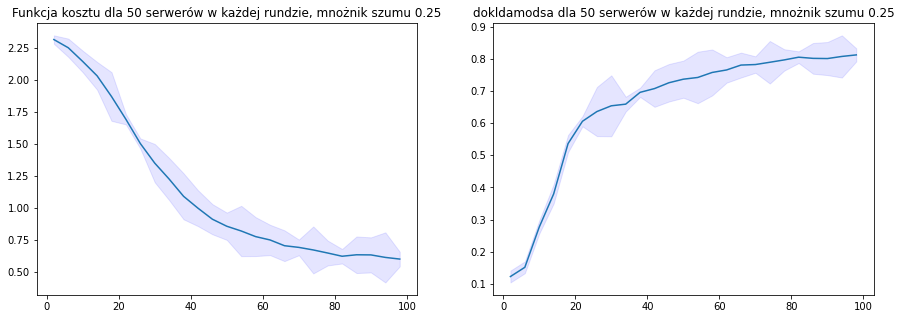

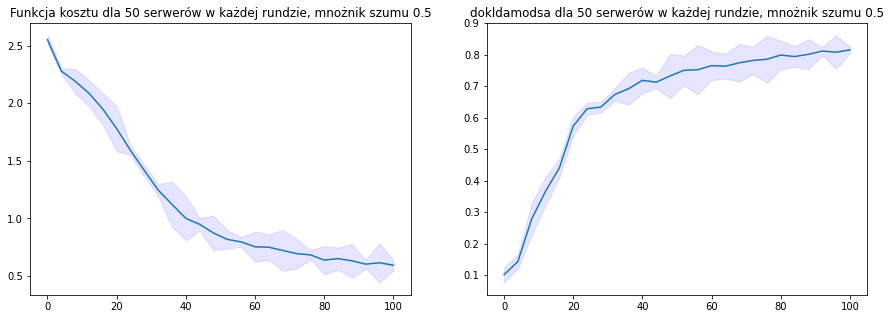

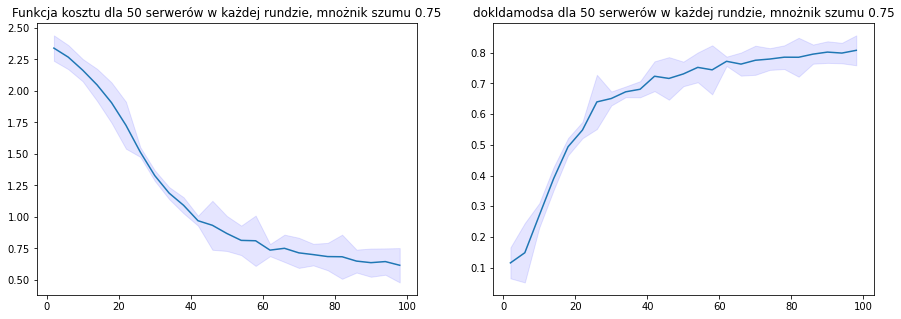

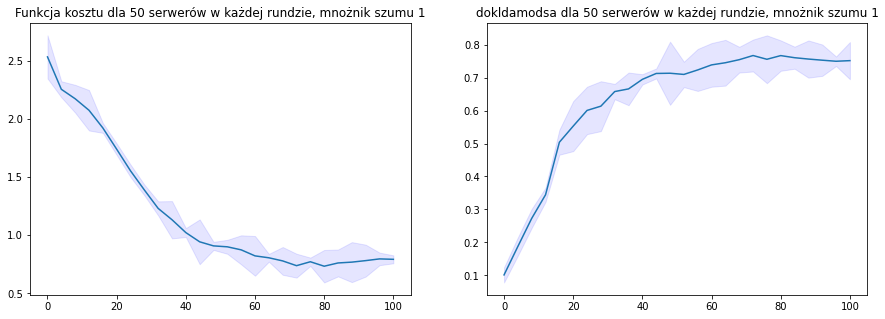

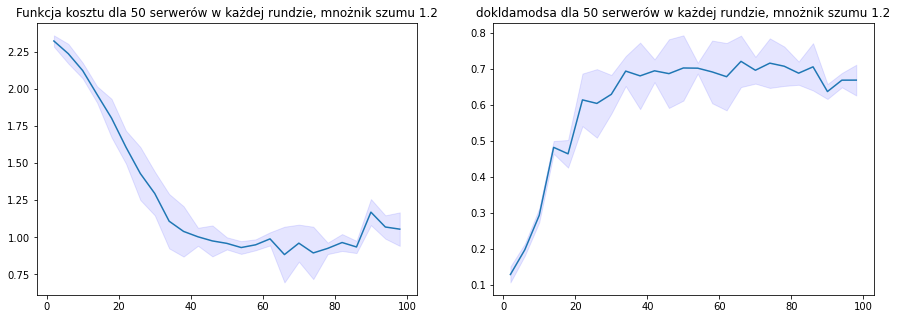

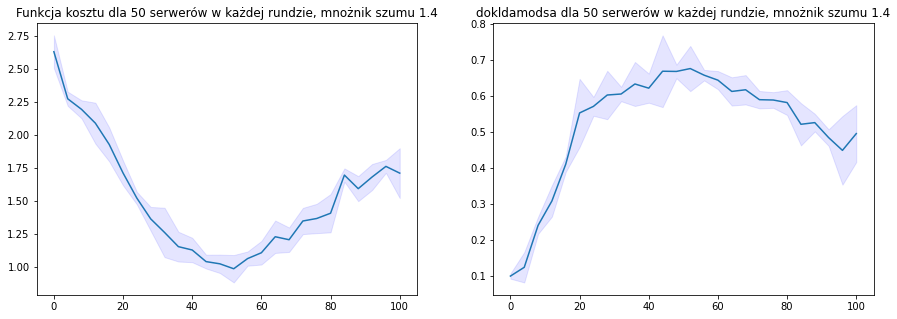

In [ ]:
client70_0 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_0 = smaller_sampling(client70_0)
client70_0 =  client70_0[client70_0.NoiseMultiplier == 0]
make_plot_interval(client70_0, '50 serwerów w każdej rundzie, mnożnik szumu 0')

client70_25 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_25 = smaller_sampling(client70_25)
client70_25 =  client70_25[client70_25.NoiseMultiplier == 0.25]
make_plot_interval(client70_25, '50 serwerów w każdej rundzie, mnożnik szumu 0.25')

client70_5 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_5 = smaller_sampling(client70_5)
client70_5 =  client70_5[client70_5.NoiseMultiplier == 0.5]
make_plot_interval(client70_5, '50 serwerów w każdej rundzie, mnożnik szumu 0.5')

client70_75 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_75 = smaller_sampling(client70_75)
client70_75 =  client70_75[client70_75.NoiseMultiplier == 0.75]
make_plot_interval(client70_75, '50 serwerów w każdej rundzie, mnożnik szumu 0.75')

client70_1 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_1 = smaller_sampling(client70_1)
client70_1 =  client70_1[client70_1.NoiseMultiplier == 1]
make_plot_interval(client70_1, '50 serwerów w każdej rundzie, mnożnik szumu 1')

client70_12 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_12 = smaller_sampling(client70_12)
client70_12 =  client70_12[client70_12.NoiseMultiplier == 1.2]
make_plot_interval(client70_12, '50 serwerów w każdej rundzie, mnożnik szumu 1.2')

client70_14 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client70_all.csv')
client70_14 = smaller_sampling(client70_14)
client70_14 =  client70_14[client70_14.NoiseMultiplier == 1.4]
make_plot_interval(client70_14, '50 serwerów w każdej rundzie, mnożnik szumu 1.4')

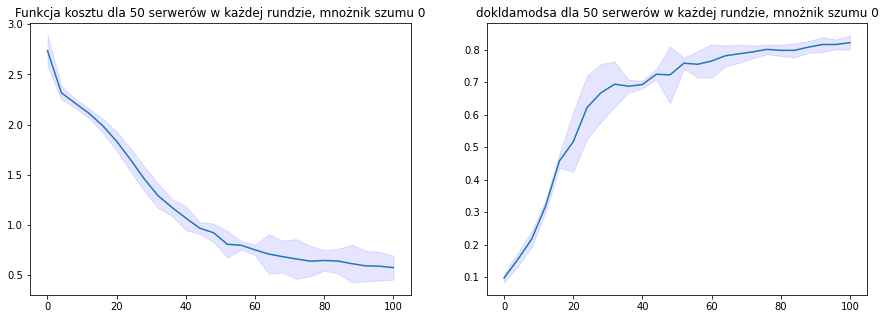

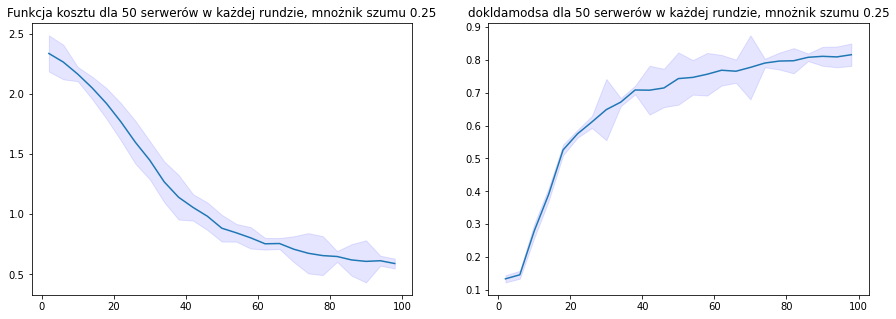

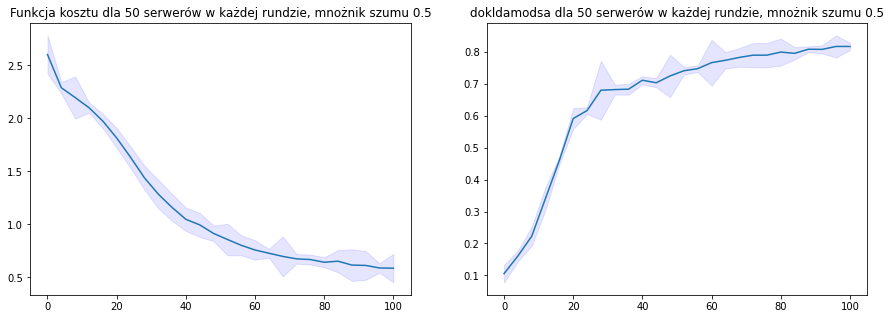

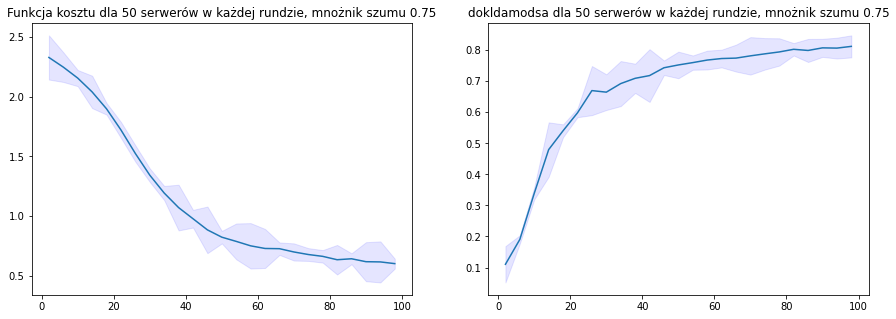

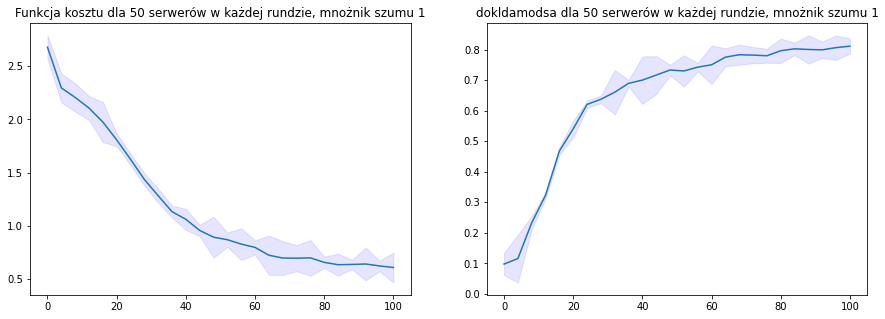

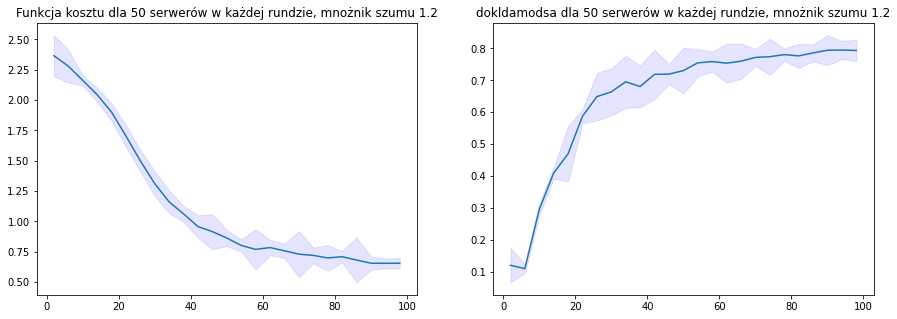

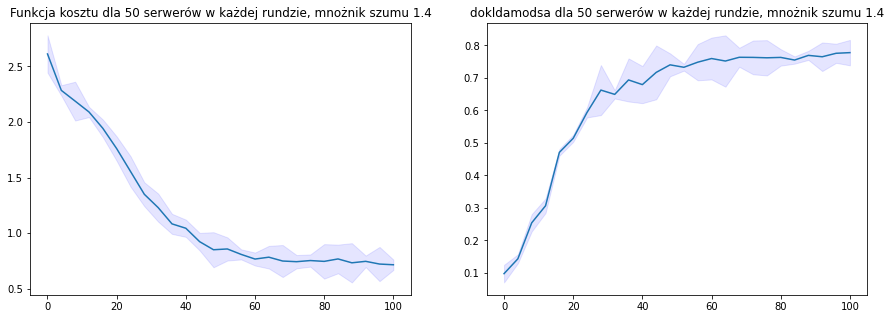

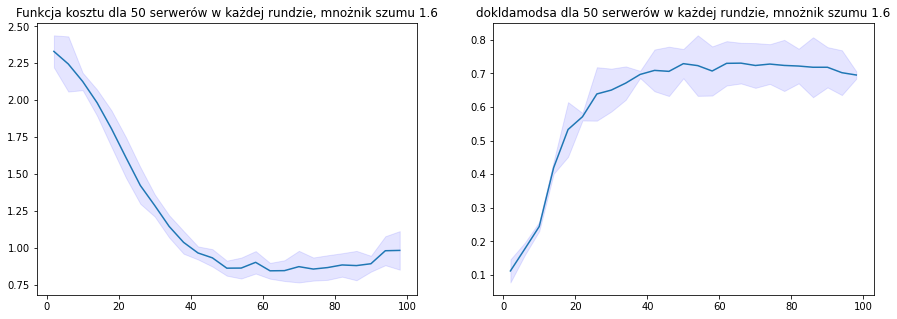

In [ ]:
client100_0 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_0 = smaller_sampling(client100_0)
client100_0 =  client100_0[client100_0.NoiseMultiplier == 0]
make_plot_interval(client100_0, '50 serwerów w każdej rundzie, mnożnik szumu 0')

client100_25 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_25 = smaller_sampling(client100_25)
client100_25 =  client100_25[client100_25.NoiseMultiplier == 0.25]
make_plot_interval(client100_25, '50 serwerów w każdej rundzie, mnożnik szumu 0.25')

client100_5 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_5 = smaller_sampling(client100_5)
client100_5 =  client100_5[client100_5.NoiseMultiplier == 0.5]
make_plot_interval(client100_5, '50 serwerów w każdej rundzie, mnożnik szumu 0.5')

client100_75 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_75 = smaller_sampling(client100_75)
client100_75 =  client100_75[client100_75.NoiseMultiplier == 0.75]
make_plot_interval(client100_75, '50 serwerów w każdej rundzie, mnożnik szumu 0.75')

client100_1 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_1 = smaller_sampling(client100_1)
client100_1 =  client100_1[client100_1.NoiseMultiplier == 1]
make_plot_interval(client100_1, '50 serwerów w każdej rundzie, mnożnik szumu 1')

client100_12 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_12 = smaller_sampling(client100_12)
client100_12 =  client100_12[client100_12.NoiseMultiplier == 1.2]
make_plot_interval(client100_12, '50 serwerów w każdej rundzie, mnożnik szumu 1.2')

client100_14 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_14 = smaller_sampling(client100_14)
client100_14 =  client100_14[client100_14.NoiseMultiplier == 1.4]
make_plot_interval(client100_14, '50 serwerów w każdej rundzie, mnożnik szumu 1.4')

client100_16 = pd.read_csv('/content/drive/MyDrive/inz/fed+diff/client100_all.csv')
client100_16 = smaller_sampling(client100_16)
client100_16 =  client100_16[client100_16.NoiseMultiplier == 1.6]
make_plot_interval(client100_16, '50 serwerów w każdej rundzie, mnożnik szumu 1.6')